***Adrián Yared Armas de la Nuez***

# Imports

In [1]:
import pandas as pd  # Data handling
import numpy as np  # Numerical calculations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical graphics
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting and validation
from sklearn.naive_bayes import GaussianNB  # Naïve Bayes model
from sklearn.neighbors import KNeighborsClassifier  # KNN model
from sklearn.metrics import confusion_matrix, accuracy_score  # Evaluation metrics
from sklearn.feature_selection import SelectKBest, f_classif  # Feature selection
import joblib  # Save and load models
import seaborn as sns  # Confusion matrix visualization
from sklearn.preprocessing import StandardScaler  # Data scaling

# Red wine

## 1 Dataset Load

In [2]:
# Load datasets
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';') # Red Wine

### 1.1 Separate features and labels

In [3]:
X_red = red_wine.drop(columns=['quality'])
y_red = red_wine['quality']

## 2 Correlation matrix

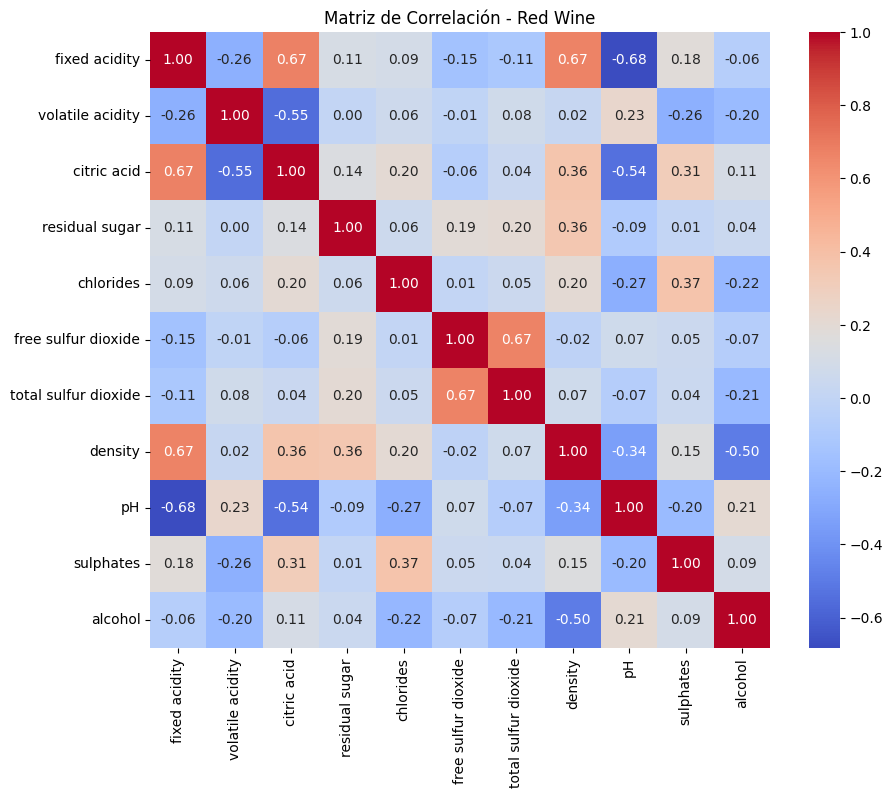

In [4]:
# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_red.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación - Red Wine")
plt.show()

## 3 Characteristic selection (SelectKBest)

In [5]:
# Feature selection using SelectKBest
k = 8  # Select the top 8 features
selector = SelectKBest(score_func=f_classif, k=k)
X_red_selected = selector.fit_transform(X_red, y_red)
selected_features = X_red.columns[selector.get_support()]
print(f"Selected features: {selected_features.tolist()}")


Selected features: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


## 4 Trainning presition compare between NaivaBayes and KNN. applying Cross Validation.

In [6]:
# Comparison of Naïve Bayes and KNN using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X_red_selected, y_red, test_size=0.2, random_state=42)
# Data scale for a better presition
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### NB

In [7]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Naïve Bayes - Average Accuracy: {nb_scores.mean():.4f}")


Naïve Bayes - Average Accuracy: 0.5614


### Knn

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(f"KNN (k=5) - Average Accuracy: {knn_scores.mean():.4f}")

KNN (k=5) - Average Accuracy: 0.5950


### Train best model

In [9]:
best_model = nb if nb_scores.mean() > knn_scores.mean() else knn
best_model.fit(X_train, y_train)

KNeighborsClassifier()

## 5 Train and confussion matrix

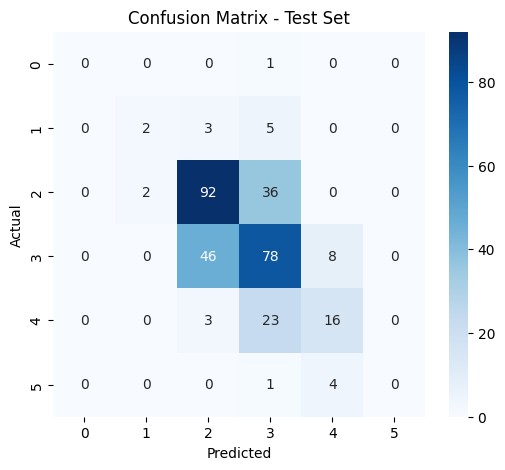

In [10]:
# Train the best model and obtain the confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()

### 5.2 Model metadata file export

In [11]:
# Export the model
joblib.dump(best_model, 'best_wine_model.pkl')

['best_wine_model.pkl']

### 5.3 Import the model

In [15]:
# Import the model
loaded_model = joblib.load('best_wine_model.pkl')

### 5.4 Apply the model (preddict) to all dataset and obtain confussion matrix

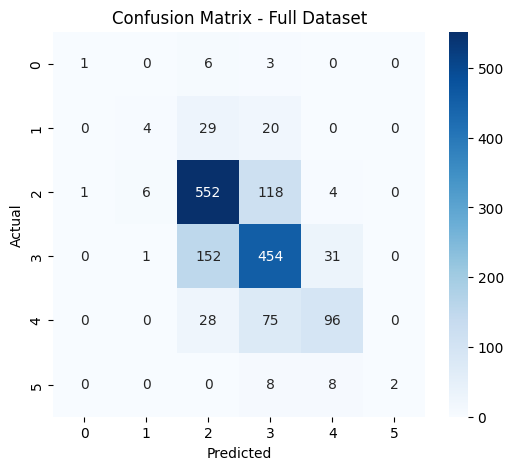

In [13]:
# Apply the model to the entire dataset and obtain the confusion matrix
y_all_pred = loaded_model.predict(scaler.transform(X_red_selected))
overall_cm = confusion_matrix(y_red, y_all_pred)
plt.figure(figsize=(6,5))
sns.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Full Dataset")
plt.show()

## 6. Result compare (quality) ussing a confussion matrix

In [14]:
# Compare accuracy
accuracy = accuracy_score(y_red, y_all_pred)
print(f"Final Accuracy: {accuracy:.4f}")

Final Accuracy: 0.6936


# 7. White wine
- (Apply the same procedure to the white wine dataset)

## 7.1 Dataset load

In [2]:
# Fetch dataset
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

### 7.1.1 Separate features and labels

In [3]:
# data (as pandas dataframes) (white wine)
X_white = white_wine.drop(columns=['quality'])
y_white = white_wine['quality']

## 7.2 Correlation matrix

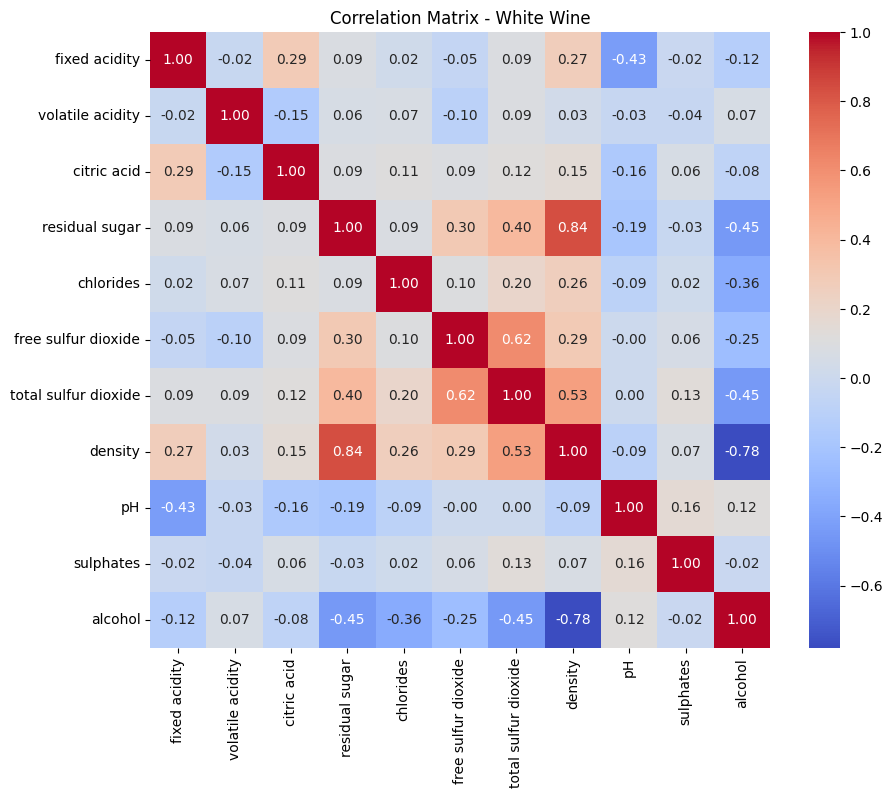

In [4]:
# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_white.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix - White Wine")
plt.show()

## 7.3 Characteristic selection (SelectKBest)

In [5]:
# Feature selection using SelectKBest
k = 8  # Select the top 8 features
selector = SelectKBest(score_func=f_classif, k=k)
X_white_selected = selector.fit_transform(X_white, y_white)
selected_features = X_white.columns[selector.get_support()]
print(f"Selected features: {selected_features.tolist()}")

Selected features: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']


## 7.4 Trainning presition compare between NaivaBayes and KNN. applying Cross Validation.

In [6]:
# Comparison of Naïve Bayes and KNN using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X_white_selected, y_white, test_size=0.2, random_state=42)
# Data scale for a better presition
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### NB

In [7]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Naïve Bayes - Average Accuracy: {nb_scores.mean():.4f}")


Naïve Bayes - Average Accuracy: 0.4400


### Knn

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(f"KNN (k=5) - Average Accuracy: {knn_scores.mean():.4f}")

KNN (k=5) - Average Accuracy: 0.5350


### select best model

In [9]:
best_model = nb if nb_scores.mean() > knn_scores.mean() else knn
best_model.fit(X_train, y_train)

KNeighborsClassifier()

## 7.5 Train and confussion matrix

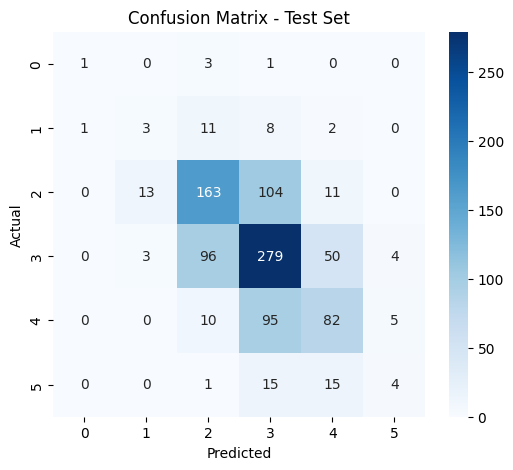

In [10]:
# Train the best model and obtain the confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()

### 7.5.2 Model metadata file export

In [11]:
# Export the model
joblib.dump(best_model, 'best_wine_model_white.pkl')

['best_wine_model_white.pkl']

### 7.5.3 Import the model

In [12]:
# Import the model
loaded_model = joblib.load('best_wine_model_white.pkl')

### 7.5.4 Apply the model (preddict) to all dataset and obtain confussion matrix

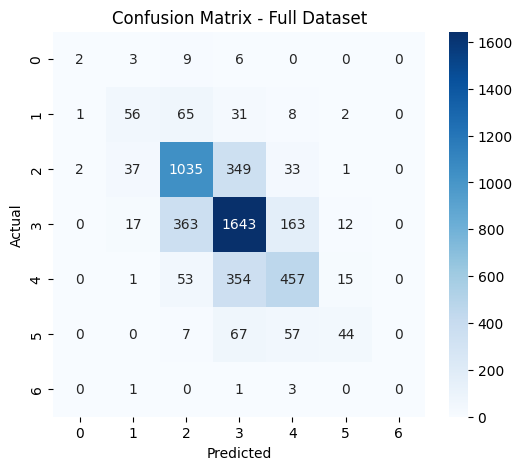

In [13]:
# Apply the model to the entire dataset and obtain the confusion matrix
y_all_pred = loaded_model.predict(scaler.transform(X_white_selected))
overall_cm = confusion_matrix(y_white, y_all_pred)
plt.figure(figsize=(6,5))
sns.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Full Dataset")
plt.show()

## 7.6. Result compare (quality) ussing a confussion matrix

In [14]:
# Compare accuracy
accuracy = accuracy_score(y_white, y_all_pred)
print(f"Final Accuracy: {accuracy:.4f}")

Final Accuracy: 0.6609
